<a href="https://colab.research.google.com/github/Ajay1994/Logical_Fallacy_Detection/blob/master/LF_Casual_Oversimplification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('drive/My Drive/Cognitive Vigilance/')
!pwd

/content/drive/My Drive/Cognitive Vigilance


In [2]:
!pip install newspaper3k

In [3]:
import numpy as np
import pandas as pd
import re
import random
from newspaper import Article
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from datasets.myutils import *
from sklearn.utils import shuffle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
contractions_dict = {"'cause": 'because',
 "I'd": 'I had / I would',
 "I'd've": 'I would have',
 "I'll": 'I shall / I will',
 "I'll've": 'I shall have / I will have',
 "I'm": 'I am',
 "I've": 'I have',
 "ain't": 'am not / are not / is not / has not / have not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is / how does',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'let us',
 "ma'am": 'madam',
 "mayn't": 'may not',
 "might've": 'might have',
 "mightn't": 'might not',
 "mightn't've": 'might not have',
 "must've": 'must have',
 "mustn't": 'must not',
 "mustn't've": 'must not have',
 "needn't": 'need not',
 "needn't've": 'need not have',
 "o'clock": 'of the clock',
 "oughtn't": 'ought not',
 "oughtn't've": 'ought not have',
 "sha'n't": 'shall not',
 "shan't": 'shall not',
 "shan't've": 'shall not have',
 "she'd": 'she had / she would',
 "she'd've": 'she would have',
 "she'll": 'she shall / she will',
 "she'll've": 'she shall have / she will have',
 "she's": 'she has / she is',
 "should've": 'should have',
 "shouldn't": 'should not',
 "shouldn't've": 'should not have',
 "so's": 'so as / so is',
 "so've": 'so have',
 "that'd": 'that would / that had',
 "that'd've": 'that would have',
 "that's": 'that has / that is',
 "there'd": 'there had / there would',
 "there'd've": 'there would have',
 "there's": 'there has / there is',
 "they'd": 'they had / they would',
 "they'd've": 'they would have',
 "they'll": 'they shall / they will',
 "they'll've": 'they shall have / they will have',
 "they're": 'they are',
 "they've": 'they have',
 "to've": 'to have',
 "wasn't": 'was not',
 "we'd": 'we had / we would',
 "we'd've": 'we would have',
 "we'll": 'we will',
 "we'll've": 'we will have',
 "we're": 'we are',
 "we've": 'we have',
 "weren't": 'were not',
 "what'll": 'what shall / what will',
 "what'll've": 'what shall have / what will have',
 "what're": 'what are',
 "what's": 'what has / what is',
 "what've": 'what have',
 "when's": 'when has / when is',
 "when've": 'when have',
 "where'd": 'where did',
 "where's": 'where has / where is',
 "where've": 'where have',
 "who'll": 'who shall / who will',
 "who'll've": 'who shall have / who will have',
 "who's": 'who has / who is',
 "who've": 'who have',
 "why's": 'why has / why is',
 "why've": 'why have',
 "will've": 'will have',
 "won't": 'will not',
 "won't've": 'will not have',
 "would've": 'would have',
 "wouldn't": 'would not',
 "wouldn't've": 'would not have',
 "y'all": 'you all',
 "y'all'd": 'you all would',
 "y'all'd've": 'you all would have',
 "y'all're": 'you all are',
 "y'all've": 'you all have',
 "you'd": 'you had / you would',
 "you'd've": 'you would have',
 "you'll": 'you shall / you will',
 "you'll've": 'you shall have / you will have',
 "you're": 'you are',
 "you've": 'you have'}


contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [0]:
contractions_re

re.compile(r"('cause|I'd|I'd've|I'll|I'll've|I'm|I've|ain't|aren't|can't|can't've|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|he's|how'd|how'd'y|how'll|how's|isn't|it'd|it'd've|it'll|it'll've|it's|let's|ma'am|mayn't|might've|mightn't|mightn't've|must've|mustn't|mustn't've|needn't|needn't've|o'clock|oughtn't|oughtn't've|sha'n't|shan't|shan't've|she'd|she'd've|she'll|she'll've|she's|should've|shouldn't|shouldn't've|so's|so've|that'd|that'd've|that's|there'd|there'd've|there's|they'd|they'd've|they'll|they'll've|they're|they've|to've|wasn't|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what's|what've|when's|when've|where'd|where's|where've|who'll|who'll've|who's|who've|why's|why've|will've|won't|won't've|would've|wouldn't|wouldn't've|y'all|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've)",
re.UNICODE)

In [0]:
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

In [0]:
def cleaner(s):
    s= re.sub(r'[^\x00-\x7F]','',s) #remove ascii
    s=s.replace('•',' ')
    s=s.replace('\n\n','.\n') #replace double \n with full stops and \n
    s = re.sub('\.\.+', '.', s) #remove multiple dots
    s=s.replace('\n',' ') #remove newliner
    s=re.sub(r'[a-z]\.', r'\g<0> ', s)
    s=re.sub(r'(?<!\w)([A-Z])\.', r'\1', s) #remove periods from abbrevations
    s=s.replace(u'\xa0', u' ')
    s=re.sub(' +',' ',s) #remove extra whitespaces
    #s=s.lower()
    s=expand_contractions(s)
    return s

In [0]:
str_punc_to_be_removed = "!#$%&()*+-/:;<=>?@[\]^_`{|}~▲‹›»—•–‘«)(…][}{="
table = str.maketrans(dict.fromkeys(str_punc_to_be_removed))

def clean_text(msg):
#     start_time = time.time()

    #print("------------ Cleaning Text: clean_text() ---------------")
    msg = re.sub('[^"|".join(str_punc_to_be_removed)0-9a-zA-Z“”‘’.,]+' , " ", msg )  #Anything not in this will be removed
    msg = re.sub(" +" , " " , msg ) #Removing multiple whitespaces
    msg = msg.strip() #Removing leading and trailing spaces
    msg = msg.replace("“" , '"' ) #Replacing with appropriate quotes
    msg = msg.replace("”" , '"' ) #Replacing with appropriate quotes
    msg = msg.replace("‘" , "'" ) #Replacing with appropriate quotes
    msg = msg.replace("’" , "'" ) #Replacing with appropriate quotes
    msg = msg.replace('\n' , ' ') #Replacing newline with space
    #print("Cleaned msg:" , msg)
    
    processed = []
    for w in msg.split():
        w = str(w).translate(table)
        if w != "":
            processed.append(w)
    
#     end_time = time.time()
#     print_msg("clean_text ended, Time taken:" + str(end_time-start_time) + "sec")
    return ' '.join(w for w in processed)



In [43]:
url = "https://timesofindia.indiatimes.com/business/india-business/govt-eyes-17bn-investment-proposals-to-boost-local-manufacturing/articleshow/76166375.cms"
article = Article(url)
article.download()
article.parse()
article_text = article.text
article_text

'(Representative image)\n\nNEW DELHI: The government is considering proposals for investment of $16-17 billion (around Rs 1.25 lakh crore) to boost domestic production of air conditioners and its components, furniture and leather footwear, while looking at options, including duty hikes, to reduce import dependence and push exports.“To increase manufacturing, ‘Make in India’ and employment, priority sectors have been identified and work has started in three — furniture, air conditioner, leather & footwear. Just in case of air conditioners, we import over 30% of our demand. We need to reduce this quickly. Similarly, we have a small share in global exports , despite being the second-largest leather producer,” PM Narendra Modi said at CII’s annual session.Commerce and industry minister Piyush Goyal has held several rounds of talks with a group of CEOs, led by M&M MD Pawan Goenka , with development clusters being the key. “The overall thrust is to give a push to domestic manufacturing once 

**Cleaning Text**

In [0]:
def _getSentences(article_text):
  text = cleaner(article_text)
  text = clean_text(text)
  sentences = sent_tokenize(text)
  return sentences

In [9]:
causal_connective_markers = {
    "if ":"5",
    "as a result":"15",
    "consequently":"5",
    "hence":"10",
    "if only":"10",
    "in the end":"5",
    "in turn":"5",
    "largely as a result":"15",
    "so that":"5",
    "thereby":"10",
    "thereupon":"10",
    "therefore":"10",
    "thus":"10",
    "as a consequence":"15",
    "in consequence":"10",
    "apparently because":"10",
    "at least partly because":"10",
    "because":"5",
    "in large part because":"10",
    "mainly because":"15",
    "merely because":"15",
    "only because":"15",
    "particularly because":"15",
    "particularly since":"10",
    "primarily because":"15",
    "only when":"10",
    "especially if":"15",
    "only if":"10",
    "particularly if":"15",
    "typically if":"15",
} 
causal_connective_markers_re = re.compile('(%s)' % '|'.join(causal_connective_markers.keys()))
causal_connective_markers_re

re.compile(r'(if |as a result|consequently|hence|if only|in the end|in turn|largely as a result|so that|thereby|thereupon|therefore|thus|as a consequence|in consequence|apparently because|at least partly because|because|in large part because|mainly because|merely because|only because|particularly because|particularly since|primarily because|only when|especially if|only if|particularly if|typically if)',
re.UNICODE)

In [0]:
def _getCandidateSentences(sentences):
  sent_candidates = []
  for sent in sentences:
    sent_l = sent.lower()
    if len(causal_connective_markers_re.findall(sent_l)) > 0:
      sent_candidates.append(sent)

  return sent_candidates

In [45]:
_getCandidateSentences(_getSentences(article_text))

['Further investment of over 1 billion has been proposed to scale up the leather footwear business to attract global investors and improve the quality and branding exercise so that Indian exports, which have a meagre 3.5 share, can compete with rivals from China, Vietnam and Indonesia, sources told TOI.For ACs, the government has been advised to increase customs duty on components to discourage imports from China.']

In [11]:
print(train_folder)
articles = read_articles_from_file_list(train_folder)
ref_articles_id, ref_span_starts, ref_span_ends, train_gold_labels = read_predictions_from_file(train_labels_file)
print("Loaded %d annotations from %d articles" % (len(ref_span_starts), len(set(ref_articles_id))))

datasets/train-articles
Loaded 6129 annotations from 357 articles


In [0]:
def _getTrainDataFrame(full_text=True):
    negative_samples = []
    print(len(ref_articles_id))
    print(len(ref_span_starts))
    print(len(ref_span_ends))
    print(len(train_gold_labels))
    traindata = []
    for idx, strt, end, label in zip(ref_articles_id, ref_span_starts, ref_span_ends, train_gold_labels):
        tempdata = {}
        tempdata['id'] = idx
        tempdata['strt'] = int(strt)
        tempdata['end'] = int(end)
        tempdata['label'] = label
        articletext = articles[idx]
        tempdata['text'] = articletext[tempdata['strt']:tempdata['end']]

        if full_text == True:
            tempdata['full_text'] = tempdata['text'].replace("\n", " ")
            articletext = articletext.replace("\n\n", "\n")
            #articletext = cleanText(articletext)
            sentences = articletext.split("\n")
            for s in sentences:
                if s.find(tempdata["text"]) != -1:
                    tempdata['full_text'] = s
                elif len(s) > 0 and random.randint(1,10) > 6 and len(negative_samples) < 4000:
                    negative_samples.append(s)
        traindata.append(tempdata)
    alltrainId = []
    alltrainfulltext = []
    alltraintext = []
    alltrainlabel = []

    for d in traindata:
        alltrainId.append(d['id'])
        alltraintext.append(d['text'])
        if full_text == True:
            alltrainfulltext.append(d['full_text'])
        alltrainlabel.append(d['label'])

    alltrain = pd.DataFrame()
    alltrain['id'] = alltrainId
    if full_text == True:
        alltrain['full_text'] = alltrainfulltext
    alltrain['Text'] = alltraintext
    alltrain['Label'] = alltrainlabel
    return alltrain, negative_samples

In [14]:
train_data, negative_samples = _getTrainDataFrame()

6129
6129
6129
6129


In [0]:
Causal_Oversimplification_df = train_data[train_data["Label"] == "Causal_Oversimplification"]
Causal_Oversimplification_df = Causal_Oversimplification_df[["full_text", "Label"]]

In [16]:
temp = pd.DataFrame()
temp["full_text"] = negative_samples
temp["Label"] = [0 for i in range(0, len(negative_samples))]
print("Positive Class Length :", len(Causal_Oversimplification_df))
print("Negative Class Length :", len(temp))
dataset = pd.concat([Causal_Oversimplification_df, temp])
dataset = shuffle(dataset)
dataset = dataset.replace("Causal_Oversimplification", 1)
print("Combined Length :", len(dataset))

Positive Class Length : 209
Negative Class Length : 4000
Combined Length : 4209


In [0]:
train = dataset[:3000]
test = dataset[3000:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f494460ea20>]],
      dtype=object)

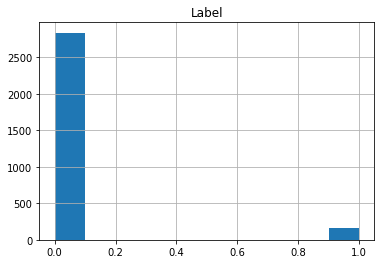

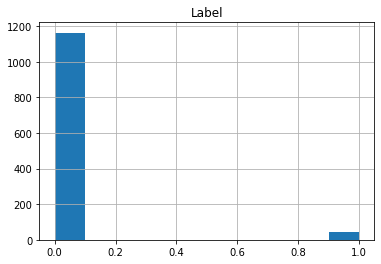

In [18]:
train.hist()
test.hist()

In [0]:
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from datetime import datetime

In [23]:
import tensorflow as tf
#!pip uninstall tensorflow==2.2.0
!pip install tensorflow==1.15.0
!pip install bert-tensorflow

     |████████████████████████████████| 412.3MB 41kB/s 
     |████████████████████████████████| 512kB 38.5MB/s 
     |████████████████████████████████| 3.8MB 25.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=110472b6b2f6619454996e8469c8c75a18cd04a2f6cbe1a223d9423af0d8ddf5
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: 

     |████████████████████████████████| 71kB 1.9MB/s 


In [20]:
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization

In [0]:
DATA_COLUMN = "full_text"
LABEL_COLUMN = "Label"
# Use the InputExample class from BERT's run_classifier code to create examples from the data
train_InputExamples = train.apply(lambda x: bert.run_classifier.InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this example
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

test_InputExamples = test.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

In [22]:
# This is a path to an uncased (all lowercase) version of BERT
BERT_MODEL_HUB = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"

def create_tokenizer_from_hub_module():
  """Get the vocab file and casing info from the Hub module."""
  with tf.Graph().as_default():
    bert_module = hub.Module(BERT_MODEL_HUB)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    with tf.Session() as sess:
      vocab_file, do_lower_case = sess.run([tokenization_info["vocab_file"],
                                            tokenization_info["do_lower_case"]])
      
  return bert.tokenization.FullTokenizer(
      vocab_file=vocab_file, do_lower_case=do_lower_case)

tokenizer = create_tokenizer_from_hub_module()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [0]:
# We'll set sequences to be at most 128 tokens long.
MAX_SEQ_LENGTH = 128
label_list = [0, 1]
# Convert our train and test features to InputFeatures that BERT understands.
train_features = bert.run_classifier.convert_examples_to_features(train_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)
test_features = bert.run_classifier.convert_examples_to_features(test_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

In [0]:
def create_model(is_predicting, input_ids, input_mask, segment_ids, labels,
                 num_labels):
  """Creates a classification model."""

  bert_module = hub.Module(
      BERT_MODEL_HUB,
      trainable=True)
  bert_inputs = dict(
      input_ids=input_ids,
      input_mask=input_mask,
      segment_ids=segment_ids)
  bert_outputs = bert_module(
      inputs=bert_inputs,
      signature="tokens",
      as_dict=True)

  # Use "pooled_output" for classification tasks on an entire sentence.
  # Use "sequence_outputs" for token-level output.
  output_layer = bert_outputs["pooled_output"]

  hidden_size = output_layer.shape[-1].value

  # Create our own layer to tune for politeness data.
  output_weights = tf.get_variable(
      "output_weights", [num_labels, hidden_size],
      initializer=tf.truncated_normal_initializer(stddev=0.02))

  output_bias = tf.get_variable(
      "output_bias", [num_labels], initializer=tf.zeros_initializer())

  with tf.variable_scope("loss"):

    # Dropout helps prevent overfitting
    output_layer = tf.nn.dropout(output_layer, keep_prob=0.9)

    logits = tf.matmul(output_layer, output_weights, transpose_b=True)
    logits = tf.nn.bias_add(logits, output_bias)
    log_probs = tf.nn.log_softmax(logits, axis=-1)

    # Convert labels into one-hot encoding
    one_hot_labels = tf.one_hot(labels, depth=num_labels, dtype=tf.float32)

    predicted_labels = tf.squeeze(tf.argmax(log_probs, axis=-1, output_type=tf.int32))
    # If we're predicting, we want predicted labels and the probabiltiies.
    if is_predicting:
      return (predicted_labels, log_probs)

    # If we're train/eval, compute loss between predicted and actual label
    per_example_loss = -tf.reduce_sum(one_hot_labels * log_probs, axis=-1)
    loss = tf.reduce_mean(per_example_loss)
    return (loss, predicted_labels, log_probs)

In [0]:
# model_fn_builder actually creates our model function
# using the passed parameters for num_labels, learning_rate, etc.
def model_fn_builder(num_labels, learning_rate, num_train_steps,
                     num_warmup_steps):
  """Returns `model_fn` closure for TPUEstimator."""
  def model_fn(features, labels, mode, params):  # pylint: disable=unused-argument
    """The `model_fn` for TPUEstimator."""

    input_ids = features["input_ids"]
    input_mask = features["input_mask"]
    segment_ids = features["segment_ids"]
    label_ids = features["label_ids"]

    is_predicting = (mode == tf.estimator.ModeKeys.PREDICT)
    
    # TRAIN and EVAL
    if not is_predicting:

      (loss, predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      train_op = bert.optimization.create_optimizer(
          loss, learning_rate, num_train_steps, num_warmup_steps, use_tpu=False)

      # Calculate evaluation metrics. 
      def metric_fn(label_ids, predicted_labels):
        accuracy = tf.metrics.accuracy(label_ids, predicted_labels)
        f1_score = tf.contrib.metrics.f1_score(
            label_ids,
            predicted_labels)
        auc = tf.metrics.auc(
            label_ids,
            predicted_labels)
        recall = tf.metrics.recall(
            label_ids,
            predicted_labels)
        precision = tf.metrics.precision(
            label_ids,
            predicted_labels) 
        true_pos = tf.metrics.true_positives(
            label_ids,
            predicted_labels)
        true_neg = tf.metrics.true_negatives(
            label_ids,
            predicted_labels)   
        false_pos = tf.metrics.false_positives(
            label_ids,
            predicted_labels)  
        false_neg = tf.metrics.false_negatives(
            label_ids,
            predicted_labels)
        return {
            "eval_accuracy": accuracy,
            "f1_score": f1_score,
            "auc": auc,
            "precision": precision,
            "recall": recall,
            "true_positives": true_pos,
            "true_negatives": true_neg,
            "false_positives": false_pos,
            "false_negatives": false_neg
        }

      eval_metrics = metric_fn(label_ids, predicted_labels)

      if mode == tf.estimator.ModeKeys.TRAIN:
        return tf.estimator.EstimatorSpec(mode=mode,
          loss=loss,
          train_op=train_op)
      else:
          return tf.estimator.EstimatorSpec(mode=mode,
            loss=loss,
            eval_metric_ops=eval_metrics)
    else:
      (predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      predictions = {
          'probabilities': log_probs,
          'labels': predicted_labels
      }
      return tf.estimator.EstimatorSpec(mode, predictions=predictions)

  # Return the actual model function in the closure
  return model_fn

In [0]:
# Compute train and warmup steps from batch size
# These hyperparameters are copied from this colab notebook (https://colab.sandbox.google.com/github/tensorflow/tpu/blob/master/tools/colab/bert_finetuning_with_cloud_tpus.ipynb)
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 3.0
# Warmup is a period of time where hte learning rate 
# is small and gradually increases--usually helps training.
WARMUP_PROPORTION = 0.1
# Model configs
SAVE_CHECKPOINTS_STEPS = 500
SAVE_SUMMARY_STEPS = 100
OUTPUT_DIR = "checkpoints_Casual/"

In [0]:
# Compute # train and warmup steps from batch size
num_train_steps = int(len(train_features) / BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

In [0]:
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

In [29]:
model_fn = model_fn_builder(
  num_labels=len(label_list),
  learning_rate=LEARNING_RATE,
  num_train_steps=num_train_steps,
  num_warmup_steps=num_warmup_steps)

estimator = tf.estimator.Estimator(
  model_fn=model_fn,
  config=run_config,
  params={"batch_size": BATCH_SIZE})

INFO:tensorflow:Using config: {'_model_dir': 'checkpoints_Casual/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 500, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f48fbaa80f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'checkpoints_Casual/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 500, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f48fbaa80f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
# Create an input function for training. drop_remainder = True for using TPUs.
train_input_fn = bert.run_classifier.input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=False)

In [31]:
print(f'Beginning Training!')
current_time = datetime.now()
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
print("Training took time ", datetime.now() - current_time)

Beginning Training!
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into checkpoints_Casual/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into checkpoints_Casual/model.ckpt.


INFO:tensorflow:loss = 0.640681, step = 0


INFO:tensorflow:loss = 0.640681, step = 0


INFO:tensorflow:global_step/sec: 0.592528


INFO:tensorflow:global_step/sec: 0.592528


INFO:tensorflow:loss = 0.05887012, step = 100 (168.771 sec)


INFO:tensorflow:loss = 0.05887012, step = 100 (168.771 sec)


INFO:tensorflow:global_step/sec: 0.674733


INFO:tensorflow:global_step/sec: 0.674733


INFO:tensorflow:loss = 0.099147536, step = 200 (148.205 sec)


INFO:tensorflow:loss = 0.099147536, step = 200 (148.205 sec)


INFO:tensorflow:Saving checkpoints for 281 into checkpoints_Casual/model.ckpt.


INFO:tensorflow:Saving checkpoints for 281 into checkpoints_Casual/model.ckpt.


INFO:tensorflow:Loss for final step: 0.003159853.


INFO:tensorflow:Loss for final step: 0.003159853.


Training took time  0:08:16.208207


In [0]:
test_input_fn = run_classifier.input_fn_builder(
    features=test_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

In [33]:
estimator.evaluate(input_fn=test_input_fn, steps=None)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-06-03T09:59:16Z


INFO:tensorflow:Starting evaluation at 2020-06-03T09:59:16Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from checkpoints_Casual/model.ckpt-281


INFO:tensorflow:Restoring parameters from checkpoints_Casual/model.ckpt-281


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2020-06-03-09:59:44


INFO:tensorflow:Finished evaluation at 2020-06-03-09:59:44


INFO:tensorflow:Saving dict for global step 281: auc = 0.7876003, eval_accuracy = 0.9818031, f1_score = 0.7027027, false_negatives = 19.0, false_positives = 3.0, global_step = 281, loss = 0.07484029, precision = 0.8965517, recall = 0.5777778, true_negatives = 1161.0, true_positives = 26.0


INFO:tensorflow:Saving dict for global step 281: auc = 0.7876003, eval_accuracy = 0.9818031, f1_score = 0.7027027, false_negatives = 19.0, false_positives = 3.0, global_step = 281, loss = 0.07484029, precision = 0.8965517, recall = 0.5777778, true_negatives = 1161.0, true_positives = 26.0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 281: checkpoints_Casual/model.ckpt-281


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 281: checkpoints_Casual/model.ckpt-281


{'auc': 0.7876003,
 'eval_accuracy': 0.9818031,
 'f1_score': 0.7027027,
 'false_negatives': 19.0,
 'false_positives': 3.0,
 'global_step': 281,
 'loss': 0.07484029,
 'precision': 0.8965517,
 'recall': 0.5777778,
 'true_negatives': 1161.0,
 'true_positives': 26.0}

In [0]:
def getPrediction(in_sentences):
  labels = ["Negative", "Positive"]
  input_examples = [run_classifier.InputExample(guid="", text_a = x, text_b = None, label = 0) for x in in_sentences] # here, "" is just a dummy label
  input_features = run_classifier.convert_examples_to_features(input_examples, label_list, MAX_SEQ_LENGTH, tokenizer)
  predict_input_fn = run_classifier.input_fn_builder(features=input_features, seq_length=MAX_SEQ_LENGTH, is_training=False, drop_remainder=False)
  predictions = estimator.predict(predict_input_fn)
  return [(sentence, np.exp(prediction['probabilities']), labels[prediction['labels']]) for sentence, prediction in zip(in_sentences, predictions)]

In [0]:
pred_sentences = [
  "President Trump has been in office for a month and gas prices have been skyrocketing. The rise in gas prices is because of President Trump.",
  "The reason New Orleans was hit so hard with the hurricane was because of all the immoral people who live there.",
  "if France had not have declared war on Germany then world war two would have never happened.",
  "If I apologised for this to China, then China would be the regime that decides what I publish or not." ,
  "If the American consumer loses faith, and the coronavirus will be a real test of faith, then a recession is going to happen.",
  "While respecting the freedom of speech and, in particular, the personal freedom to express one's attitude, CCCD Secretary General John Liu said that the cartoonist “lacked manners and personal qualities such as compassion and sympathy”."
]

In [133]:
predictions = getPrediction(pred_sentences)
predictions

INFO:tensorflow:Writing example 0 of 6


INFO:tensorflow:Writing example 0 of 6


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] president trump has been in office for a month and gas prices have been sky ##rock ##eti ##ng . the rise in gas prices is because of president trump . [SEP]


INFO:tensorflow:tokens: [CLS] president trump has been in office for a month and gas prices have been sky ##rock ##eti ##ng . the rise in gas prices is because of president trump . [SEP]


INFO:tensorflow:input_ids: 101 2343 8398 2038 2042 1999 2436 2005 1037 3204 1998 3806 7597 2031 2042 3712 16901 20624 3070 1012 1996 4125 1999 3806 7597 2003 2138 1997 2343 8398 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2343 8398 2038 2042 1999 2436 2005 1037 3204 1998 3806 7597 2031 2042 3712 16901 20624 3070 1012 1996 4125 1999 3806 7597 2003 2138 1997 2343 8398 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] the reason new orleans was hit so hard with the hurricane was because of all the im ##moral people who live there . [SEP]


INFO:tensorflow:tokens: [CLS] the reason new orleans was hit so hard with the hurricane was because of all the im ##moral people who live there . [SEP]


INFO:tensorflow:input_ids: 101 1996 3114 2047 5979 2001 2718 2061 2524 2007 1996 7064 2001 2138 1997 2035 1996 10047 22049 2111 2040 2444 2045 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1996 3114 2047 5979 2001 2718 2061 2524 2007 1996 7064 2001 2138 1997 2035 1996 10047 22049 2111 2040 2444 2045 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] if france had not have declared war on germany then world war two would have never happened . [SEP]


INFO:tensorflow:tokens: [CLS] if france had not have declared war on germany then world war two would have never happened . [SEP]


INFO:tensorflow:input_ids: 101 2065 2605 2018 2025 2031 4161 2162 2006 2762 2059 2088 2162 2048 2052 2031 2196 3047 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2065 2605 2018 2025 2031 4161 2162 2006 2762 2059 2088 2162 2048 2052 2031 2196 3047 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] if i ap ##olo ##gis ##ed for this to china , then china would be the regime that decides what i publish or not . [SEP]


INFO:tensorflow:tokens: [CLS] if i ap ##olo ##gis ##ed for this to china , then china would be the regime that decides what i publish or not . [SEP]


INFO:tensorflow:input_ids: 101 2065 1045 9706 12898 17701 2098 2005 2023 2000 2859 1010 2059 2859 2052 2022 1996 6939 2008 7288 2054 1045 10172 2030 2025 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2065 1045 9706 12898 17701 2098 2005 2023 2000 2859 1010 2059 2859 2052 2022 1996 6939 2008 7288 2054 1045 10172 2030 2025 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] if the american consumer loses faith , and the corona ##virus will be a real test of faith , then a recession is going to happen . [SEP]


INFO:tensorflow:tokens: [CLS] if the american consumer loses faith , and the corona ##virus will be a real test of faith , then a recession is going to happen . [SEP]


INFO:tensorflow:input_ids: 101 2065 1996 2137 7325 12386 4752 1010 1998 1996 21887 23350 2097 2022 1037 2613 3231 1997 4752 1010 2059 1037 19396 2003 2183 2000 4148 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2065 1996 2137 7325 12386 4752 1010 1998 1996 21887 23350 2097 2022 1037 2613 3231 1997 4752 1010 2059 1037 19396 2003 2183 2000 4148 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from checkpoints_Casual/model.ckpt-281


INFO:tensorflow:Restoring parameters from checkpoints_Casual/model.ckpt-281


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


[('President Trump has been in office for a month and gas prices have been skyrocketing. The rise in gas prices is because of President Trump.',
  array([0.01250985, 0.9874901 ], dtype=float32),
  'Positive'),
 ('The reason New Orleans was hit so hard with the hurricane was because of all the immoral people who live there.',
  array([0.01370376, 0.9862962 ], dtype=float32),
  'Positive'),
 ('if France had not have declared war on Germany then world war two would have never happened.',
  array([0.1346831, 0.8653169], dtype=float32),
  'Positive'),
 ('If I apologised for this to China, then China would be the regime that decides what I publish or not.',
  array([0.17569135, 0.8243087 ], dtype=float32),
  'Positive'),
 ('If the American consumer loses faith, and the coronavirus will be a real test of faith, then a recession is going to happen.',
  array([0.04903575, 0.9509643 ], dtype=float32),
  'Positive'),
 ("While respecting the freedom of speech and, in particular, the personal freed

**Analysis Report of live News Articles**

In [0]:
def _getArticleText(link):
  #Pass link object into Article
  article = Article(link)
  #Call the download and parse methods to download information
  article.download()
  article.parse()
  return article.text

In [0]:
link = 'https://www.foxnews.com/media/rush-limbaugh-trump-coronavirus-outbreak-united-states'
article_text = _getArticleText(link)

In [0]:
print(article_text)

In [0]:
text = cleaner(article_text)
text = clean_text(text)
sentences = sent_tokenize(text)
sentences

In [0]:
def _getTwoClassifierOutput(article_text):
  candidates = _getCandidateSentences(_getSentences(article_text))
  if len(candidates) == 0:
    return None
  elif len(candidates) == 1:
    candidates.append("None")
  predictions = getPrediction(candidates)
  return predictions

def _getModelPrediction(article_text):
  candidates = _getSentences(article_text)
  if len(candidates) == 0:
    return None
  elif len(candidates) == 1:
    candidates.append("None")
  predictions = getPrediction(candidates)
  return predictions

In [0]:
R_predictions = _getTwoClassifierOutput(article_text)
M_predictions = _getModelPrediction(article_text)

In [156]:
output = set()
if R_predictions != None:
  for prediction in R_predictions:
    if prediction[1][1] > 0.50:
      print(prediction)
      output.add(prediction[0])

if M_predictions != None:
  for prediction in M_predictions:
    if prediction[1][1] > 0.80:
      print(prediction)
      output.add(prediction[0])

('All he has is the power that being the president of the lone superpower in the world gives him.', array([0.08497876, 0.91502124], dtype=float32), 'Positive')
('This is what Washington politicians do.', array([0.02786659, 0.9721334 ], dtype=float32), 'Positive')


In [151]:
for item in output:
  print(item)

At the same time as the Chinese government and the Chinese people are making every effort to combat this unusual and urgent health threat, Jyllands Posten has published a satirical drawing by Niels Bo Bojesen which is an insult to China and hurts the feelings of the Chinese people the Chinese Embassy relayed.
If I apologised for this to China, then China would be the regime that decides what I publish or not.
